# Apply MassChargeCuration

Finn Mier and Reihaneh Mostolizadeh developed [MassChargeCuration](https://github.com/Biomathsys/MassChargeCuration) which can be used to automatically assign charges and masses to metabolites in order to balance the model.

In [1]:
import MCC
from MCC import MassChargeCuration
import pandas as pd

We will now apply MCC model by model and look at the output as well.

## Strain 1116

ERROR:root:Error getting formula for 12dgr160 in bigg.metabolite:
Traceback (most recent call last):
  File "/Users/baeuerle/Library/Python/3.9/lib/python/site-packages/requests/models.py", line 910, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/simplejson-3.17.6-py3.9-macosx-10.9-x86_64.egg/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/simplejson-3.17.6-py3.9-macosx-10.9-x86_64.egg/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_decode(s)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/simplejson-3.17.6-py3.9-macosx-10.9-x86_64.egg/simplejson/decoder.py", line 400, in raw_decode
    return self.scan_once(s, idx=_w(s, idx).end())
simplejson.errors.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During

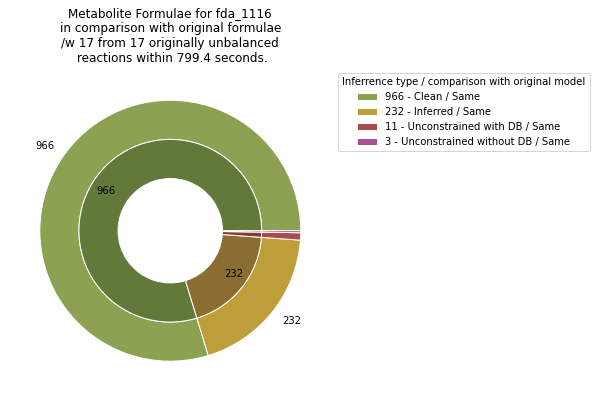

In [2]:
model_path = '../../models/Cstr_17.xml'
balancer = MassChargeCuration(model_path, run_optimization = True, update_ids = True, data_path='../../data/mcc/') #
balancer.generate_visual_report().show()

In [3]:
metabolite_report_df = balancer.generate_metabolite_report()
metabolite_report_df[::200]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity
0,M_12dgr160_e,"1,2-Diacyl-sn-glycerol (dihexadecanoyl, n-C16:0)",C35H68O5,0,C35H68O5,0,Inferred,unconstrained Target & Adherence,,,Same
200,M_pg141_p,"Phosphatidylglycerol (ditetradec-7-enoyl, n-C1...",C34H62O10P,-1,C34H62O10P,-1,Inferred,unconstrained Target & Adherence,,,Same
400,M_db4p_c,"3,4-dihydroxy-2-butanone 4-phosphate",C4H7O6P,-2,C4H7O6P,-2,Clean,unconstrained Target & Adherence & seed.compou...,seed.compound:cpd11225,seed.compound:cpd11225,Same
600,M_3hocoa_c,(S)-3-Hydroxyoctanoyl-CoA,C29H46N7O18P3S,-4,C29H46N7O18P3S,-4,Clean,unconstrained Target & Adherence & metanetx.ch...,"metanetx.chemical:MNXM1104724, seed.compound:c...","metanetx.chemical:MNXM1104724, seed.compound:c...",Same
800,M_melib_c,Melibiose C12H22O11,C12H22O11,0,C12H22O11,0,Clean,unconstrained Target & Adherence & metanetx.ch...,"metanetx.chemical:MNXM1103965, metanetx.chemic...","metanetx.chemical:MNXM1103965, metanetx.chemic...",Same
1000,M_dhptd_c,"4,5-dihydroxy-2,3-pentanedione",C5H8O4,0,C5H8O4,0,Clean,unconstrained Target & Adherence & seed.compou...,"seed.compound:cpd08636, seed.compound:cpd08638...","seed.compound:cpd08636, seed.compound:cpd08638...",Same
1200,M_fru_p,D-Fructose,C6H12O6,0,C6H12O6,0,Clean,unconstrained Target & Adherence & seed.compou...,"seed.compound:cpd27040, seed.compound:cpd19015...","seed.compound:cpd27040, seed.compound:cpd19015...",Same


In [4]:
metabolite_report_df[metabolite_report_df["Similarity"] != "Same"]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity


In [5]:
metabolite_report_df[metabolite_report_df["Used Databases"] == ""]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity
0,M_12dgr160_e,"1,2-Diacyl-sn-glycerol (dihexadecanoyl, n-C16:0)",C35H68O5,0,C35H68O5,0,Inferred,unconstrained Target & Adherence,,,Same
1,M_12dgr161_c,"1,2-Diacyl-sn-glycerol (dihexadec-9-enoyl, n-C...",C35H64O5,0,C35H64O5,0,Inferred,unconstrained Target & Adherence,,,Same
2,M_12dgr161_p,"1,2-Diacyl-sn-glycerol (dihexadec-9-enoyl, n-C...",C35H64O5,0,C35H64O5,0,Inferred,unconstrained Target & Adherence,,,Same
3,M_12dgr180_e,"1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)",C39H76O5,0,C39H76O5,0,Inferred,unconstrained Target & Adherence,,,Same
4,M_1ag160_e,1 Acyl sn glycerol hexadecanoate,C19H38O4,0,C19H38O4,0,Inferred,unconstrained Target & Adherence,,,Same
...,...,...,...,...,...,...,...,...,...,...,...
230,M_tded5_2_coa_c,Trans cis tetradeca 2 5 dienoyl CoA,C35H54N7O17P3S,-4,C35H54N7O17P3S,-4,Inferred,unconstrained Target & Adherence,,,Same
231,M_ugmd_c,UDP-N-acetylmuramoyl-L-alanyl-D-gamma-glutamyl...,C35H51N7O26P2,-4,C35H51N7O26P2,-4,Inferred,unconstrained Target & Adherence,,,Same
234,M_fdxox_c,Oxidized ferredoxin,Fe26HR,6,Fe26HR,6,Unconstrained,unconstrained Target & Adherence,,,Same
236,M_glutrna_c,L-Glutamyl-tRNA(Glu),C33H41N12O24P3R,0,C33H41N12O24P3R,0,Unconstrained,unconstrained Target & Adherence,,,Same


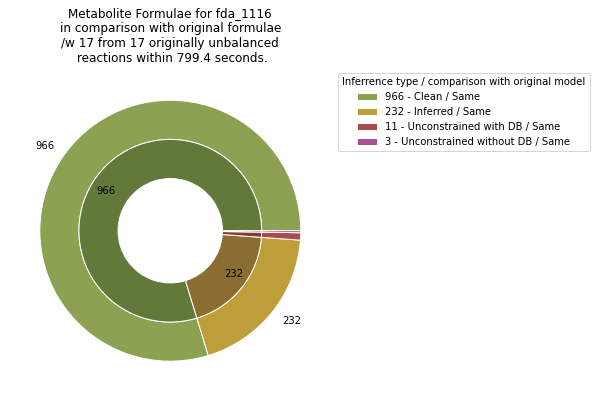

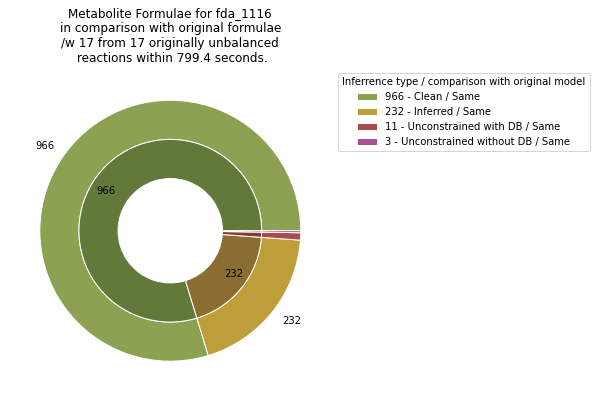

In [8]:
balancer.model_interface.write_model(model_path)
balancer.generate_visual_report(f"Cstr_17_visual")
balancer.generate_metabolite_report(f"Cstr_17_metabolites")
balancer.generate_reaction_report(f"Cstr_17_reactions")

## Type Strain 1154

In [ ]:
model_path = '../../models/Cstr_14.xml'
balancer = MassChargeCuration(model_path, run_optimization = True, update_ids = True, data_path='../../data/mcc/') #
balancer.generate_visual_report().show()

In [ ]:
balancer.model_interface.write_model(model_path)
balancer.generate_visual_report(f"Cstr_14_visual")
balancer.generate_metabolite_report(f"Cstr_14_metabolites")
balancer.generate_reaction_report(f"Cstr_14_reactions")

## Strain 1197

In [ ]:
model_path = '../../models/Cstr_15.xml'
balancer = MassChargeCuration(model_path, run_optimization = True, update_ids = True, data_path='../../data/mcc/') #
balancer.generate_visual_report().show()

In [ ]:
balancer.model_interface.write_model(model_path)
balancer.generate_visual_report(f"Cstr_15_visual")
balancer.generate_metabolite_report(f"Cstr_15_metabolites")
balancer.generate_reaction_report(f"Cstr_15_reactions")

## Strain 1115

In [ ]:
model_path = '../../models/Cstr_16.xml'
balancer = MassChargeCuration(model_path, run_optimization = True, update_ids = True, data_path='../../data/mcc/') #
balancer.generate_visual_report().show()

In [ ]:
balancer.model_interface.write_model(model_path)
balancer.generate_visual_report(f"Cstr_16_visual")
balancer.generate_metabolite_report(f"Cstr_16_metabolites")
balancer.generate_reaction_report(f"Cstr_16_reactions")

## Strain KC-Na-01

In [ ]:
model_path = '../../models/Cstr_KC-Na-01.xml'
balancer = MassChargeCuration(model_path, run_optimization = True, update_ids = True, data_path='../../data/mcc/') #
balancer.generate_visual_report().show()

In [ ]:
balancer.model_interface.write_model(model_path)
balancer.generate_visual_report(f"Cstr_KC_visual")
balancer.generate_metabolite_report(f"Cstr_KC_metabolites")
balancer.generate_reaction_report(f"Cstr_KC_reactions")